<a href="https://colab.research.google.com/github/prp021/hello-world/blob/main/PlantsSeedlingClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plants Seedling Classification

## Background and Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

## Objective

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

## Data Description

This dataset contains images of unique plants belonging to 12 different species.
The data file names are:
images.npy
Label.csv
Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
The goal of the project is to create a classifier capable of determining a plant's species from an image.

## List of Plant species

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet
- Guide to solve the project seamlessly



## Import the libraries

In [1]:
# for reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
import os

# for displaying images using OpenCV
from google.colab.patches import cv2_imshow                                                   

# for clearing memory and setting random seed
from tensorflow.keras import backend
import random

# for one hot encoding
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 

# for model building
from sklearn.model_selection import train_test_split

# for convolution neural network
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ReduceLROnPlateau

# for data augmentation
from keras.preprocessing.image import ImageDataGenerator

# for metrics
from sklearn.metrics import classification_report


## Load the data

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load the images file
images = np.load('/content/drive/MyDrive/Colab Notebooks/ComputerVisionProject/images.npy')

# load the labels file
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ComputerVisionProject/Labels.csv')

## Overview of the dataset
Let's print the shape of the images and labels

In [4]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


The dataset is composed of 4750 images of 128 x 128 pixels and 3 channels.

In [7]:
# print array data for an image
images[0]

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]

In [8]:
labels['Label'].nunique()

12

There are 12 classes of plants in the dataset

In [13]:
# get unique plant classes
labels['Label'].unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

## Plotting images using OpenCV and matplotlib


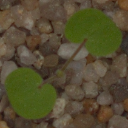

In [10]:
# plot image using OpenCV
cv2_imshow(images[20])

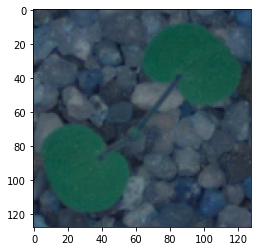

In [11]:
# plot image using matplotlib
plt.imshow(images[20])

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- We could convert the BGR images to RGB images for easy interpretability.

In [12]:
# Converting images from BGR to RGB using cvtColor function of OpenCV
#for i in range(len(images)):
#  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

## Exploratory Data Analysis

#### Visualize the data

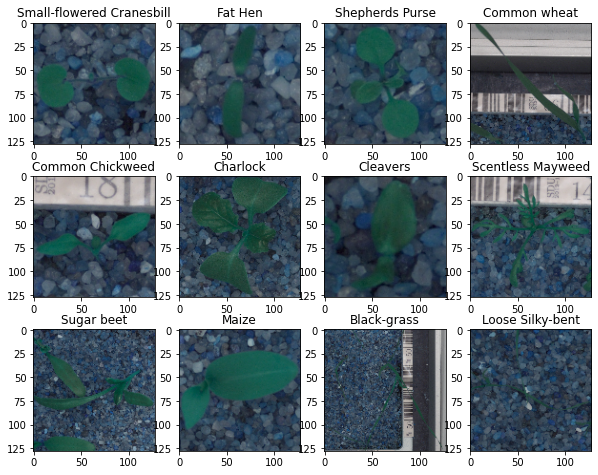

In [14]:
# get image from each of the plant classes
plants = []
for label in labels['Label'].unique():
  indexOfPlant = labels[labels['Label']==label].index[0]
  plants.append(images[indexOfPlant])

# display image and label of each type of plant in the dataset
rows = 3                                                                     
cols = 4
keys=labels['Label'].unique()  
index = 0;                                                                   
fig = plt.figure(figsize=(10, 8))                              
for i in range(cols):
    for j in range(rows):                                  
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
        ax.imshow(plants[index])                                      # Plotting the image 
        ax.set_title(keys[index])
        index=index+1
plt.show()

- Some of the plants are difficult to make out from the background. 
- There is a barcode label in some of the images adding to the noise. 
- We could try to apply Gaussian Blur to reduce the noise and also try to mask the image to extract only the green parts. 

Let us also visualize some random images

In [34]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

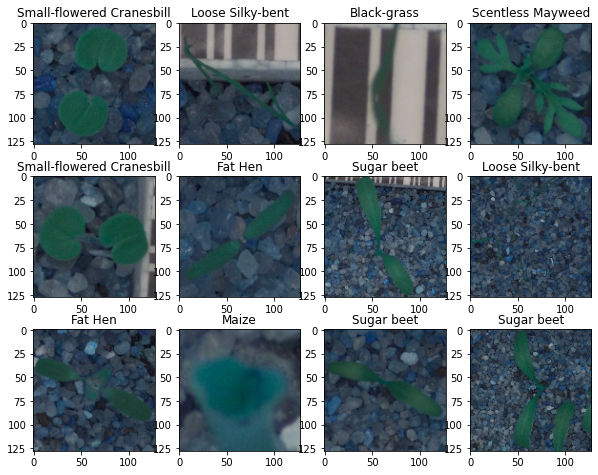

In [14]:
plot_images(images,labels)

Some plants such as 'Loose Silky-bent' and 'Black-grass' are difficult to identify against the background of the pebbles. Some of the images also have barcodes in them. This might make it difficult for our model to identify patterns. We can try to mask the background to pick up only the green portions of the image.

#### Check for data imbalance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

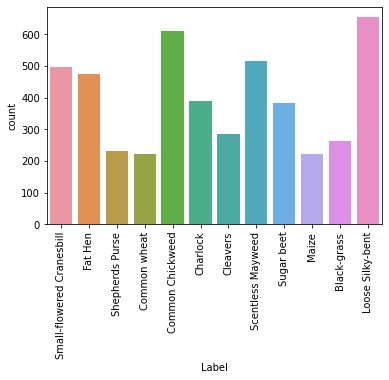

In [12]:
# display plot of plant classes and counts
sns.countplot(labels['Label'])
plt.xticks(rotation='vertical')

In [17]:
labels.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

In [16]:
labels['Label'].value_counts(normalize=True)

Loose Silky-bent             0.137684
Common Chickweed             0.128632
Scentless Mayweed            0.108632
Small-flowered Cranesbill    0.104421
Fat Hen                      0.100000
Charlock                     0.082105
Sugar beet                   0.081053
Cleavers                     0.060421
Black-grass                  0.055368
Shepherds Purse              0.048632
Common wheat                 0.046526
Maize                        0.046526
Name: Label, dtype: float64

We can see above that the dataset is not balanced. There are around 600 samples of 'Loose Silky-bent' and 'Common Chickweed' plants compared to only 200 samples of 'Maize', 'Common Wheat' or 'Shepherd's Purse'.



## Data Preprocessing

### Resizing images
Let us leave the size of the images as they are, since they are relatively small and as the dataset is not too large, model computation should not take too long.


In [15]:
#images_decreased=[]
#height = 64
#width = 64
#dimensions = (width, height)  
#for i in range(len(images)):
#  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

## Visualizing images using Gaussian Blur

Let us try to reduce/soften noise in the images using Gaussian Blurring

In [28]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0.3))

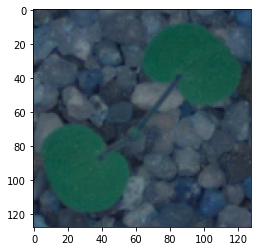

In [29]:
plt.imshow(images[20])

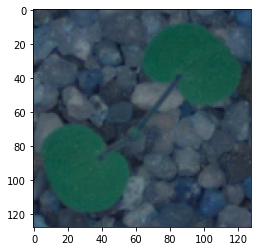

In [30]:
plt.imshow(images_gb[20])

It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

## Color detection

Detect green color in the images. 

In [31]:
# define function to apply mask to images
images_masked = []
def applyMask(imagesToMask):
  for i in range(len(imagesToMask)):
    img = imagesToMask[i]
    # convert image to hsv format
    imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # create a mask for green
    mask = cv2.inRange(imghsv, (25, 25, 15), (70, 255,255))
    # slice the green
    imask = mask>0
    green = np.zeros_like(img, np.uint8)
    green[imask] = img[imask]
    # save the new image
    images_masked.append(green)
  return images_masked

In [33]:
# apply mask on images dataset
images_masked = applyMask(images)

# display random images
plot_images(np.array(images_masked), labels)

NameError: ignored

In [22]:
# update image data
images = images_masked.copy()

In [32]:
plot_images(images,labels)

NameError: ignored

## Splitting the dataset
We will use 10% of our data for testing, 10% for validation and 80% of our data for training.
We are using the train_test_split() function from scikit-learn.

In [24]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(np.array(images),labels,
    test_size=0.1, shuffle = True, random_state = 1, stratify=labels)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.1, random_state= 1, stratify=y_train) 


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (3847, 128, 128, 3)
X_test shape: (475, 128, 128, 3)
y_train shape: (3847, 1)
y_test shape: (475, 1)
X_val shape: (428, 128, 128, 3)
y val shape: (428, 1)


## Data Normalization
Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.


In [25]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [26]:
print(X_train_normalized.shape)
print(X_val_normalized.shape)
print(X_test_normalized.shape)

(3847, 128, 128, 3)
(428, 128, 128, 3)
(475, 128, 128, 3)


## Encoding the target labels
Convert labels from names to one hot vectors

In [27]:
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.fit_transform(y_val)
y_test_encoded=enc.transform(y_test)

In [107]:
# get the shape of the target labels
print(y_train_encoded.shape)
print(y_val_encoded.shape)
print(y_test_encoded.shape)

(3847, 12)
(428, 12)
(475, 12)


## Model Evaluation

Accuracy is not a good measure of model performance when the dataset is imbalanced. We will focus on F1 score when comparing models. We can also try oversampling to address the imbalance in the dataset. 

Let us define a function that will generate and print a confusion matrix and classification report based on model predictions.

In [29]:
def printConfusionMatrixAndReport(y_pred):
  # Obtaining the categorical values from y_test_encoded and y_pred
  y_pred_vals=np.argmax(y_pred,axis=1)
  y_test_vals=np.argmax(y_test_encoded,axis=1)

  # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
  confusion_matrix = tf.math.confusion_matrix(y_test_vals,y_pred_vals)
  f, ax = plt.subplots(figsize=(10, 8))
  sns.heatmap(
      confusion_matrix,
      annot=True,
      linewidths=.4,
      fmt="d",
      square=True,
      ax=ax
  )
  plt.show()

  print(classification_report(y_test_vals, y_pred_vals))

In [30]:
# function to plot train accuracy vs validation accuracy
def plotModelAccuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

In [31]:
# function to plot train loss vs validation loss
def plotLossCurves(model, history):
  # Capturing loss history per epoch
  hist  = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  # Plotting loss at different epochs
  plt.plot(hist['loss'])
  plt.plot(hist['val_loss'])
  plt.legend(("train" , "valid") , loc =0)
  #Printing results
  plt.show()

## Model Building - Convolutional Neural Network (CNN)
Let's create a CNN model sequentially, where we will be adding the layers one after another.



First, we need to clear the previous model's history from the session.

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Let's fix the seed again after clearing the backend. Let's set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow to be able to reproduce the same results every time we run the code.

In [32]:
# set defaults
epochs = 30
batch_size = 64
random_seed = 1

# define callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [33]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

### Model 1

Now, let's build a CNN Model with the following 2 main parts -

- The Feature Extraction layers which are comprised of convolutional and pooling layers.
- The Fully Connected classification layers for prediction.


In [34]:
# Intializing a sequential model
model1 = Sequential()

model1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model1.add(Dense(12, activation='softmax'))

opt=Adam()
# Compile model
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 16)                5

### Fitting the model on the train data


In [35]:
# Fitting the model
history1=model1.fit(X_train_normalized, 
          y_train_encoded,  
          epochs=epochs, shuffle=True,
          batch_size=batch_size,validation_data=[X_val_normalized, y_val_encoded], callbacks=[es])  

Epoch 1/30
61/61 [==============================] - ETA: 0s - loss: 2.4403 - accuracy: 0.1640
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to best_model.h5
61/61 [==============================] - 7s 48ms/step - loss: 2.4403 - accuracy: 0.1640 - val_loss: 2.3122 - val_accuracy: 0.2500
Epoch 2/30
59/61 [============================>.] - ETA: 0s - loss: 2.2070 - accuracy: 0.2463
Epoch 2: val_accuracy improved from 0.25000 to 0.34813, saving model to best_model.h5
61/61 [==============================] - 2s 38ms/step - loss: 2.2046 - accuracy: 0.2485 - val_loss: 1.9416 - val_accuracy: 0.3481
Epoch 3/30
59/61 [============================>.] - ETA: 0s - loss: 2.0298 - accuracy: 0.2773
Epoch 3: val_accuracy improved from 0.34813 to 0.36682, saving model to best_model.h5
61/61 [==============================] - 2s 38ms/step - loss: 2.0299 - accuracy: 0.2768 - val_loss: 1.8634 - val_accuracy: 0.3668
Epoch 4/30
59/61 [============================>.] - ETA: 0s - loss: 1.942

### Model Evaluation on train data

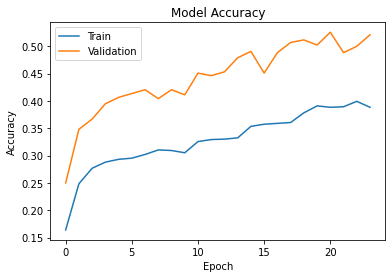

In [36]:
plotModelAccuracy(history1)

**Observations**

We can see from the above plot that the training accuracy and the validation accuracy is not good.
The model seems to overfit on the data.


### Evaluating the model on test data

In [37]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.5423 - accuracy: 0.4716 - 394ms/epoch - 26ms/step


### Generating the predictions using test data

In [38]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)

array([[1.69210008e-03, 1.08583799e-05, 1.65625173e-03, ...,
        1.51838205e-04, 3.29868606e-04, 3.95057648e-02],
       [3.74651208e-08, 3.07024121e-01, 1.07368328e-01, ...,
        9.85055696e-03, 5.40950477e-01, 1.17596127e-02],
       [3.74984071e-02, 7.15388393e-04, 9.86041967e-03, ...,
        1.45543460e-02, 3.51055246e-03, 1.96294695e-01],
       ...,
       [1.27083175e-02, 1.73648506e-01, 1.96919113e-01, ...,
        6.41832501e-02, 1.17154725e-01, 1.56490669e-01],
       [6.88382258e-08, 4.50246129e-03, 2.40953188e-04, ...,
        9.90227088e-02, 2.09621266e-02, 1.03704497e-05],
       [6.35082424e-02, 4.91158850e-03, 2.30948403e-02, ...,
        3.13158818e-02, 9.49255470e-03, 1.45978376e-01]], dtype=float32)

### Plotting the Confusion Matrix
- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

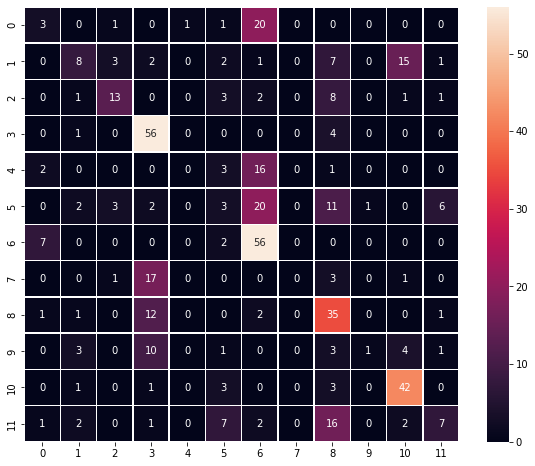

              precision    recall  f1-score   support

           0       0.21      0.12      0.15        26
           1       0.42      0.21      0.28        39
           2       0.62      0.45      0.52        29
           3       0.55      0.92      0.69        61
           4       0.00      0.00      0.00        22
           5       0.12      0.06      0.08        48
           6       0.47      0.86      0.61        65
           7       0.00      0.00      0.00        22
           8       0.38      0.67      0.49        52
           9       0.50      0.04      0.08        23
          10       0.65      0.84      0.73        50
          11       0.41      0.18      0.25        38

    accuracy                           0.47       475
   macro avg       0.36      0.36      0.32       475
weighted avg       0.40      0.47      0.40       475



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
printConfusionMatrixAndReport(y_pred)

**Observations**

We observe that most of the classes are not predicted correctly.
In comparison to the rest, we can see that classes 3, 6 and 10 are well classified.
The remaining classes are mostly misclassified.

# Model 1 training on oversampled data

In [40]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

## Oversampling using RandomOverSampler

Let us try to balance the dataset using RandomOverSampler.

### Label Encoding for OverSampling

In [41]:
# do label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_val_le = le.fit_transform(y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
# get counts for all classes
from collections import Counter
print(y_train_le.shape)
print(y_val_le.shape)
print(Counter(y_train_le))
print(Counter(y_val_le))

(3847,)
(428,)
Counter({6: 530, 3: 495, 8: 418, 10: 402, 5: 384, 1: 316, 11: 312, 2: 232, 0: 213, 9: 187, 7: 179, 4: 179})
Counter({6: 59, 3: 55, 8: 46, 10: 44, 5: 43, 1: 35, 11: 35, 2: 26, 0: 24, 9: 21, 7: 20, 4: 20})


In [43]:
# generate oversampled data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_train_ros, y_train_ros = ros.fit_resample(X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]), y_train_le)
X_val_ros, y_val_ros = ros.fit_resample(X_val.reshape(X_val.shape[0], X_val.shape[1]*X_val.shape[2]*X_val.shape[3]), y_val_le)

In [44]:
# print number of samples in X train and val oversampled datasets
print(X_train_ros.shape)
X_train_ros = X_train_ros.reshape(X_train_ros.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3])
print(X_train_ros.shape)
print(X_val_ros.shape)
X_val_ros = X_val_ros.reshape(X_val_ros.shape[0], X_val.shape[1], X_val.shape[2], X_val.shape[3])
print(X_val_ros.shape)

# print class counts y 
print(Counter(y_train_ros))
print(Counter(y_val_ros))

# print number of samples in y train and val oversampled datasets
print(y_train_ros.shape)
y_train_ros = y_train_ros.reshape(y_train_ros.shape[0],1)
print(y_train_ros.shape)
print(y_val_ros.shape)
y_val_ros = y_val_ros.reshape(y_val_ros.shape[0],1)
print(y_val_ros.shape)

(6360, 49152)
(6360, 128, 128, 3)
(708, 49152)
(708, 128, 128, 3)
Counter({2: 530, 0: 530, 6: 530, 5: 530, 1: 530, 8: 530, 3: 530, 9: 530, 10: 530, 11: 530, 7: 530, 4: 530})
Counter({1: 59, 7: 59, 9: 59, 2: 59, 10: 59, 3: 59, 6: 59, 8: 59, 4: 59, 5: 59, 11: 59, 0: 59})
(6360,)
(6360, 1)
(708,)
(708, 1)


### Encoding the target labels
Convert labels from names to one hot vectors

In [45]:
# Convert labels from names to one hot vectors.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_ros_encoded = enc.fit_transform(y_train_ros)
y_val_ros_encoded = enc.fit_transform(y_val_ros)

### Data Normalization
Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.


In [46]:
# Normalizing the image pixels
X_train_ros_normalized = X_train_ros.astype('float32')/255.0
X_val_ros_normalized = X_val_ros.astype('float32')/255.0

In [47]:
print(X_train_ros_normalized.shape)
print(X_val_ros_normalized.shape)
print(X_test_normalized.shape)

(6360, 128, 128, 3)
(708, 128, 128, 3)
(475, 128, 128, 3)


In [48]:
# update train and test data
#X_val_normalized = X_val_ros_normalized.copy()
#y_val_encoded = y_val_ros_encoded.copy()

### Build the model

In [49]:
# Intializing a sequential model
model1_over = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1_over.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model1_over.add(MaxPooling2D((2, 2), padding = 'same'))

model1_over.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1_over.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1_over.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model1_over.add(Dense(16, activation='relu'))
model1_over.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model1_over.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model1_over.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1_over.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 16)                5

### Fitting the model on oversampled data

In [50]:
# Fitting the model with 20 epochs and validation_split as 10%
history1_over=model1_over.fit(X_train_normalized, 
          y_train_encoded,  
          epochs=epochs, shuffle=True,
          batch_size=batch_size, validation_data=[X_val_normalized, y_val_encoded],callbacks=[es, mc])  

Epoch 1/30
60/61 [============================>.] - ETA: 0s - loss: 2.4409 - accuracy: 0.1669
Epoch 1: val_accuracy did not improve from 0.52570
61/61 [==============================] - 3s 41ms/step - loss: 2.4411 - accuracy: 0.1666 - val_loss: 2.3134 - val_accuracy: 0.2477
Epoch 2/30
59/61 [============================>.] - ETA: 0s - loss: 2.2106 - accuracy: 0.2434
Epoch 2: val_accuracy did not improve from 0.52570
61/61 [==============================] - 2s 38ms/step - loss: 2.2083 - accuracy: 0.2454 - val_loss: 1.9583 - val_accuracy: 0.3364
Epoch 3/30
59/61 [============================>.] - ETA: 0s - loss: 2.0406 - accuracy: 0.2767
Epoch 3: val_accuracy did not improve from 0.52570
61/61 [==============================] - 2s 38ms/step - loss: 2.0402 - accuracy: 0.2766 - val_loss: 1.8810 - val_accuracy: 0.3668
Epoch 4/30
59/61 [============================>.] - ETA: 0s - loss: 1.9446 - accuracy: 0.2887
Epoch 4: val_accuracy did not improve from 0.52570
61/61 [=======================

### Model Evaluation on train data

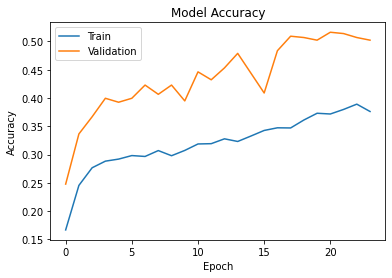

In [51]:
plotModelAccuracy(history1_over)

**Observations**

We can see from the above plot that the training accuracy of the model was good but the validation accuracy was not good.
The model seems to overfit on the data.


### Evaluating the model on test data

In [52]:
accuracy = model1_over.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.4945 - accuracy: 0.4821 - 147ms/epoch - 10ms/step


### Generating the predictions using test data

In [53]:
# Here we would get the output as probablities for each category
y_pred=model1_over.predict(X_test_normalized)

### Plotting the Confusion Matrix
- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

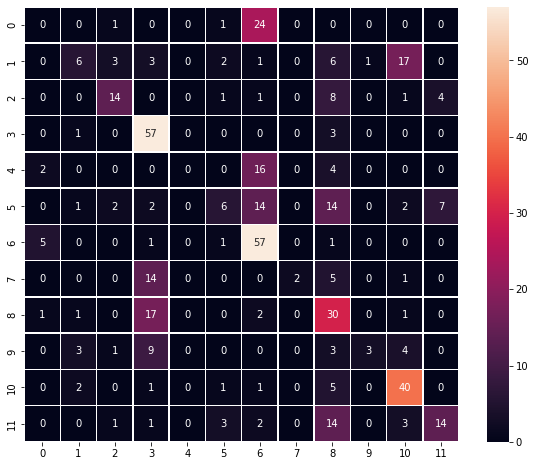

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.43      0.15      0.23        39
           2       0.64      0.48      0.55        29
           3       0.54      0.93      0.69        61
           4       0.00      0.00      0.00        22
           5       0.40      0.12      0.19        48
           6       0.48      0.88      0.62        65
           7       1.00      0.09      0.17        22
           8       0.32      0.58      0.41        52
           9       0.75      0.13      0.22        23
          10       0.58      0.80      0.67        50
          11       0.56      0.37      0.44        38

    accuracy                           0.48       475
   macro avg       0.48      0.38      0.35       475
weighted avg       0.47      0.48      0.41       475



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
printConfusionMatrixAndReport(y_pred)

**Observations**

We observe that some of the classes are not predicted correctly.
In comparison to the rest, we can see that classes 0,3, and 4 are well classified.
We can also observe that classes 1,2,5,7 and 9 are mostly misclassified.

### Model 2

Lets try to build another CNN model with more layers added to the model.

In [55]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

In [56]:
# initialized a sequential model
model2 = Sequential()
# adding first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of images
model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
# adding max pooling to reduce the size of output of first conv layer
#model2.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding second conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
#model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding third conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
#model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
#model2.add(Dropout(0.3))

# adding forth conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
#model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
#model2.add(Dropout(0.3))
model2.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())
# adding first fully connected dense layer with 1024 neurons 
model2.add(Dense(64, activation = "relu"))
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2.add(Dropout(0.5))
# adding second fully connected dense layer with 512 neurons 
model2.add(Dense(32, activation = "relu"))
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2.add(Dropout(0.5))

# adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem with 12 classes.
model2.add(Dense(12, activation = "softmax"))

optimizer = Adam(lr=0.001)
model2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 flatten (Flatten)           (None, 524288)            0         
                                                                 
 dense (Dense)               (None, 64)                3

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [57]:
history2=model2.fit(X_train_normalized, 
          y_train_encoded,  
          epochs=epochs, 
          batch_size=batch_size,validation_data=[X_val_normalized, y_val_encoded],callbacks=[es, mc],use_multiprocessing=True)

Epoch 1/30
61/61 [==============================] - ETA: 0s - loss: 2.2664 - accuracy: 0.2417
Epoch 1: val_accuracy did not improve from 0.52570
61/61 [==============================] - 10s 144ms/step - loss: 2.2664 - accuracy: 0.2417 - val_loss: 1.9420 - val_accuracy: 0.3271
Epoch 2/30
60/61 [============================>.] - ETA: 0s - loss: 1.5471 - accuracy: 0.4714
Epoch 2: val_accuracy improved from 0.52570 to 0.56308, saving model to best_model.h5
61/61 [==============================] - 9s 143ms/step - loss: 1.5465 - accuracy: 0.4715 - val_loss: 1.3460 - val_accuracy: 0.5631
Epoch 3/30
60/61 [============================>.] - ETA: 0s - loss: 1.1705 - accuracy: 0.6010
Epoch 3: val_accuracy improved from 0.56308 to 0.60981, saving model to best_model.h5
61/61 [==============================] - 9s 143ms/step - loss: 1.1703 - accuracy: 0.6010 - val_loss: 1.2218 - val_accuracy: 0.6098
Epoch 4/30
60/61 [============================>.] - ETA: 0s - loss: 0.9578 - accuracy: 0.6685
Epoch 4

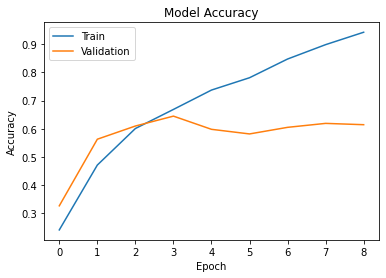

In [58]:
plotModelAccuracy(history2)

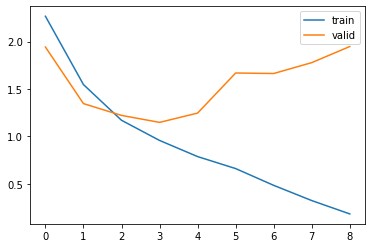

In [59]:
plotLossCurves(model2, history2)

**Observations**

We can see from the above plot that the training accuracy of the model was good but the validation accuracy was not good.
The model seems to overfit on the data.


### Evaluating the model on test data

In [60]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 2.0546 - accuracy: 0.6105 - 609ms/epoch - 41ms/step


### Generating the predictions using test data

In [61]:
# Here we would get the output as probablities for each category
y_pred=model2.predict(X_test_normalized)
y_pred

array([[2.6619181e-01, 1.3209057e-10, 1.2467453e-10, ..., 1.9525980e-05,
        4.7433362e-03, 2.7173690e-09],
       [1.9644378e-15, 9.9923813e-01, 3.6520658e-05, ..., 2.4084547e-11,
        6.9425721e-04, 2.9548859e-05],
       [3.6964270e-03, 7.3750368e-07, 1.8926419e-05, ..., 1.2112416e-03,
        2.0572480e-02, 1.1781294e-02],
       ...,
       [9.4050455e-11, 9.7119933e-01, 4.0881820e-03, ..., 5.1022187e-08,
        9.5240735e-03, 5.2912678e-03],
       [6.0162116e-15, 1.0895896e-12, 3.7733751e-15, ..., 2.8455561e-02,
        1.0351048e-05, 3.4485678e-10],
       [2.2225908e-04, 2.8433390e-06, 3.5941051e-03, ..., 2.0872222e-03,
        1.3893389e-03, 9.1419005e-01]], dtype=float32)

### Plotting the Confusion Matrix
- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

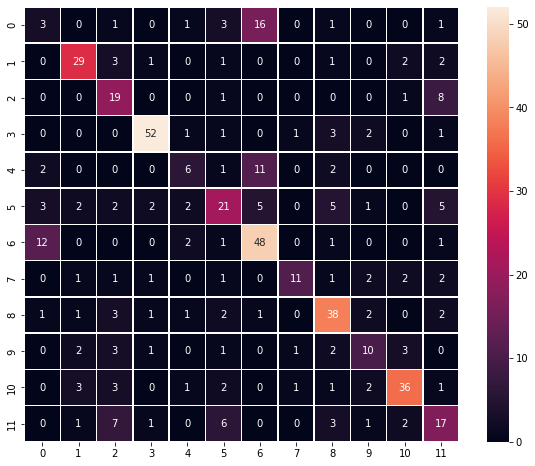

              precision    recall  f1-score   support

           0       0.14      0.12      0.13        26
           1       0.74      0.74      0.74        39
           2       0.45      0.66      0.54        29
           3       0.88      0.85      0.87        61
           4       0.43      0.27      0.33        22
           5       0.51      0.44      0.47        48
           6       0.59      0.74      0.66        65
           7       0.79      0.50      0.61        22
           8       0.66      0.73      0.69        52
           9       0.50      0.43      0.47        23
          10       0.78      0.72      0.75        50
          11       0.42      0.45      0.44        38

    accuracy                           0.61       475
   macro avg       0.58      0.55      0.56       475
weighted avg       0.61      0.61      0.61       475



In [62]:
printConfusionMatrixAndReport(y_pred)

**Observations**

We observe that some of the classes are not predicted correctly.
In comparison to the rest, we can see that classes 0,3, and 4 are well classified.
We can also observe that classes 1,2,5,7 and 9 are mostly misclassified.

## Model 2a

Lets try to build another CNN model with more layers added to the model.

In [63]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

In [64]:
# initialized a sequential model
model2a = Sequential()
# adding first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of images
model2a.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
# adding max pooling to reduce the size of output of first conv layer
model2a.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding second conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2a.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model2a.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding third conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2a.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model2a.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model2a.add(Dropout(0.3))

# adding forth conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2a.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model2a.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model2a.add(Dropout(0.3))
model2a.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model2a.add(Flatten())
# adding first fully connected dense layer with 1024 neurons 
model2a.add(Dense(64, activation = "relu"))
model2a.add(BatchNormalization())
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2a.add(Dropout(0.5))
# adding second fully connected dense layer with 512 neurons 
model2a.add(Dense(32, activation = "relu"))
model2a.add(BatchNormalization())
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2a.add(Dropout(0.5))

# adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem with 12 classes.
model2a.add(Dense(12, activation = "softmax"))

optimizer = Adam(lr=0.001)
model2a.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

model2a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [65]:
history2a=model2a.fit(X_train_normalized, 
          y_train_encoded,  
          epochs=epochs, 
          batch_size=batch_size,validation_data=[X_val_normalized, y_val_encoded],callbacks=[es, mc],use_multiprocessing=True)

Epoch 1/30
61/61 [==============================] - ETA: 0s - loss: 2.6679 - accuracy: 0.1258
Epoch 1: val_accuracy did not improve from 0.64486
61/61 [==============================] - 14s 181ms/step - loss: 2.6679 - accuracy: 0.1258 - val_loss: 2.5773 - val_accuracy: 0.1145
Epoch 2/30
60/61 [============================>.] - ETA: 0s - loss: 2.0700 - accuracy: 0.2909
Epoch 2: val_accuracy did not improve from 0.64486
61/61 [==============================] - 10s 157ms/step - loss: 2.0693 - accuracy: 0.2917 - val_loss: 2.9420 - val_accuracy: 0.1285
Epoch 3/30
60/61 [============================>.] - ETA: 0s - loss: 1.7382 - accuracy: 0.4099
Epoch 3: val_accuracy did not improve from 0.64486
61/61 [==============================] - 10s 157ms/step - loss: 1.7390 - accuracy: 0.4094 - val_loss: 2.7028 - val_accuracy: 0.1682
Epoch 4/30
60/61 [============================>.] - ETA: 0s - loss: 1.4680 - accuracy: 0.5052
Epoch 4: val_accuracy did not improve from 0.64486
61/61 [=================

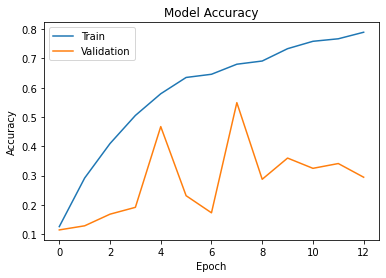

In [66]:
plotModelAccuracy(history2a)

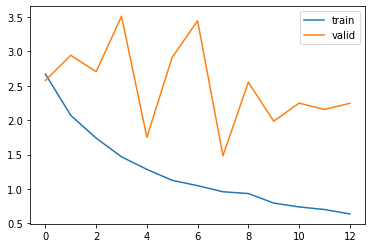

In [67]:
plotLossCurves(model2a, history2a)

**Observations**

We can see from the above plot that the training accuracy of the model was good but the validation accuracy was not good.
The model seems to overfit on the data.


### Evaluating the model on test data

In [68]:
accuracy = model2a.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 2.2484 - accuracy: 0.3200 - 1s/epoch - 97ms/step


### Generating the predictions using test data

In [69]:
# Here we would get the output as probablities for each category
y_pred=model2a.predict(X_test_normalized)
y_pred

array([[1.1872144e-02, 1.7459799e-02, 4.9983346e-01, ..., 1.8228149e-02,
        6.7625172e-02, 8.2967110e-04],
       [1.5053165e-05, 9.5703328e-01, 1.5359237e-02, ..., 3.7926664e-03,
        2.2378642e-02, 2.9621049e-05],
       [7.6752501e-03, 9.0926930e-02, 1.2212300e-01, ..., 3.4189475e-01,
        9.9166758e-02, 3.3800246e-03],
       ...,
       [2.9089887e-04, 9.1093624e-01, 8.1586130e-02, ..., 2.4215383e-03,
        1.5955213e-03, 2.3359896e-04],
       [7.6979876e-04, 7.0946310e-03, 1.7894935e-03, ..., 5.1528472e-01,
        9.7240703e-03, 7.9640821e-03],
       [1.2535145e-02, 6.0354080e-02, 6.8308330e-01, ..., 2.1586750e-02,
        2.5918041e-03, 1.1136511e-03]], dtype=float32)

### Plotting the Confusion Matrix
- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

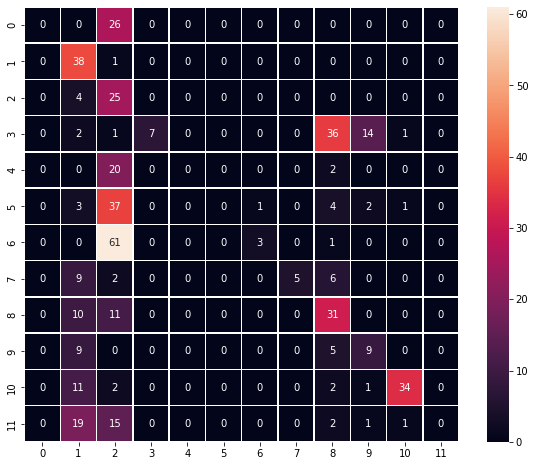

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.36      0.97      0.53        39
           2       0.12      0.86      0.22        29
           3       1.00      0.11      0.21        61
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00        48
           6       0.75      0.05      0.09        65
           7       1.00      0.23      0.37        22
           8       0.35      0.60      0.44        52
           9       0.33      0.39      0.36        23
          10       0.92      0.68      0.78        50
          11       0.00      0.00      0.00        38

    accuracy                           0.32       475
   macro avg       0.40      0.32      0.25       475
weighted avg       0.47      0.32      0.26       475



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
printConfusionMatrixAndReport(y_pred)

**Observations**

We observe that some of the classes are not predicted correctly.
In comparison to the rest, we can see that classes 0,3, and 4 are well classified.
We can also observe that classes 1,2,5,7 and 9 are mostly misclassified.

## Model 2b

Lets try to build another CNN model with more layers added to the model.

In [71]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

In [72]:
# initialized a sequential model
model2b = Sequential()
# adding first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of images
model2b.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
# adding max pooling to reduce the size of output of first conv layer
model2b.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding second conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2b.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model2b.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding third conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2b.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model2b.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model2b.add(Dropout(0.3))
model2b.add(BatchNormalization())
# adding forth conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2b.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model2b.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model2b.add(Dropout(0.3))
model2b.add(BatchNormalization())
model2b.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model2b.add(Flatten())
# adding first fully connected dense layer with 1024 neurons 
model2b.add(Dense(64, activation = "relu"))
model2b.add(BatchNormalization())
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2a.add(Dropout(0.5))
# adding second fully connected dense layer with 512 neurons 
model2b.add(Dense(32, activation = "relu"))
model2b.add(BatchNormalization())
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2a.add(Dropout(0.5))

# adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem with 12 classes.
model2b.add(Dense(12, activation = "softmax"))

optimizer = Adam(lr=0.01)
model2b.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
model2b.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [73]:
# add callback to reduce LR rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5,min_lr=0.0001,mode='auto')
history2b=model2b.fit(X_train_normalized, 
          y_train_encoded,  
          epochs=epochs, 
          batch_size=batch_size,validation_data=[X_val_normalized, y_val_encoded],callbacks=[reduce_lr],use_multiprocessing=True)

Epoch 1/30
61/61 [==============================] - 14s 210ms/step - loss: 2.3828 - accuracy: 0.1697 - val_loss: 8.6911 - val_accuracy: 0.0561 - lr: 0.0100
Epoch 2/30
61/61 [==============================] - 10s 157ms/step - loss: 1.7278 - accuracy: 0.3949 - val_loss: 3.7534 - val_accuracy: 0.2547 - lr: 0.0100
Epoch 3/30
61/61 [==============================] - 9s 155ms/step - loss: 1.3506 - accuracy: 0.5204 - val_loss: 5.1576 - val_accuracy: 0.1612 - lr: 0.0100
Epoch 4/30
61/61 [==============================] - 9s 154ms/step - loss: 1.0251 - accuracy: 0.6418 - val_loss: 3.7593 - val_accuracy: 0.3294 - lr: 0.0100
Epoch 5/30
61/61 [==============================] - 10s 157ms/step - loss: 0.8807 - accuracy: 0.6912 - val_loss: 1.8896 - val_accuracy: 0.6028 - lr: 0.0100
Epoch 6/30
61/61 [==============================] - 9s 153ms/step - loss: 0.6975 - accuracy: 0.7458 - val_loss: 4.8175 - val_accuracy: 0.3154 - lr: 0.0100
Epoch 7/30
61/61 [==============================] - 9s 153ms/step -

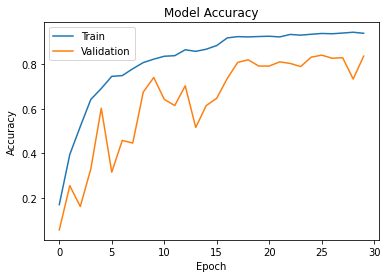

In [74]:
plotModelAccuracy(history2b)

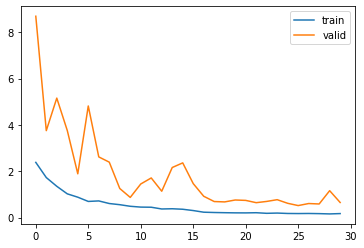

In [75]:
plotLossCurves(model2b, history2b)

**Observations**

We can see from the above plot that the training accuracy of the model was good but the validation accuracy was not good.
The model seems to overfit on the data.


### Evaluating the model on test data

In [76]:
accuracy = model2b.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 2s - loss: 0.6160 - accuracy: 0.8253 - 2s/epoch - 142ms/step


### Generating the predictions using test data

In [77]:
# Here we would get the output as probablities for each category
y_pred=model2b.predict(X_test_normalized)
y_pred

array([[2.6695419e-03, 3.9648103e-06, 7.5371703e-05, ..., 1.7680388e-07,
        3.3971702e-03, 6.6615787e-05],
       [4.3277665e-05, 1.0051326e-02, 2.7550166e-03, ..., 2.5661084e-01,
        7.2270155e-01, 4.4612627e-04],
       [9.5769545e-05, 6.2404007e-07, 3.4690506e-06, ..., 2.3780717e-04,
        2.3100367e-05, 1.2446349e-04],
       ...,
       [7.7100914e-08, 9.9598950e-01, 2.7553074e-03, ..., 4.2435584e-08,
        4.8955610e-07, 4.0007572e-07],
       [1.1998218e-04, 7.3109995e-08, 1.2751109e-07, ..., 5.4825578e-06,
        1.8995292e-05, 1.3809276e-05],
       [1.2691792e-02, 8.4840765e-05, 6.1659561e-03, ..., 5.7447441e-03,
        4.3709893e-04, 6.1354017e-01]], dtype=float32)

### Plotting the Confusion Matrix
- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

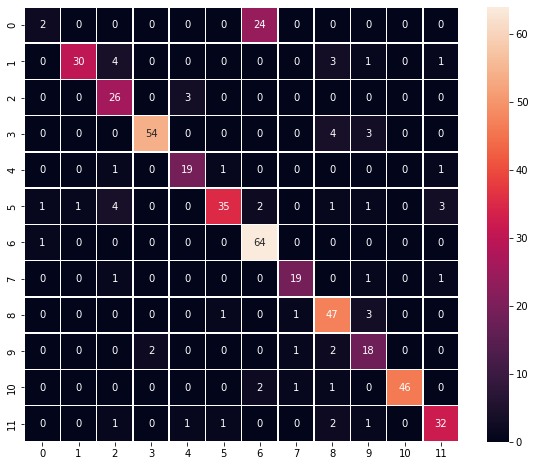

              precision    recall  f1-score   support

           0       0.50      0.08      0.13        26
           1       0.97      0.77      0.86        39
           2       0.70      0.90      0.79        29
           3       0.96      0.89      0.92        61
           4       0.83      0.86      0.84        22
           5       0.92      0.73      0.81        48
           6       0.70      0.98      0.82        65
           7       0.86      0.86      0.86        22
           8       0.78      0.90      0.84        52
           9       0.64      0.78      0.71        23
          10       1.00      0.92      0.96        50
          11       0.84      0.84      0.84        38

    accuracy                           0.83       475
   macro avg       0.81      0.79      0.78       475
weighted avg       0.83      0.83      0.81       475



In [78]:
printConfusionMatrixAndReport(y_pred)

**Observations**

We observe that some of the classes are not predicted correctly.
In comparison to the rest, we can see that classes 0,3, and 4 are well classified.
We can also observe that classes 1,2,5,7 and 9 are mostly misclassified.

## Model 2c

Lets try to build another CNN model with more layers added to the model.

In [79]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

In [80]:
# initialized a sequential model
model2c = Sequential()
# adding first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of images
model2c.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
# adding max pooling to reduce the size of output of first conv layer
model2c.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting
model2c.add(Dropout(0.1))
model2c.add(BatchNormalization())

# adding second conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2c.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model2c.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting
model2c.add(Dropout(0.1))
model2c.add(BatchNormalization())

# adding third conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2c.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model2c.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model2c.add(Dropout(0.1))
model2c.add(BatchNormalization())
# adding forth conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model2c.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model2c.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model2c.add(Dropout(0.1))
model2c.add(BatchNormalization())
model2c.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model2c.add(Flatten())
# adding first fully connected dense layer with 1024 neurons 
model2c.add(Dense(64, activation = "relu"))
model2c.add(BatchNormalization())
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2a.add(Dropout(0.5))
# adding second fully connected dense layer with 512 neurons 
model2c.add(Dense(32, activation = "relu"))
model2c.add(BatchNormalization())
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2a.add(Dropout(0.5))

# adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem with 12 classes.
model2c.add(Dense(12, activation = "softmax"))

optimizer = Adam(lr=0.01)
model2c.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
model2c.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 256)       0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 256)      1024      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [81]:
# add callback to reduce LR rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5,min_lr=0.0001,mode='auto')
history2c=model2c.fit(X_train_normalized, 
          y_train_encoded,  
          epochs=epochs, 
          batch_size=batch_size,validation_data=[X_val_normalized, y_val_encoded],callbacks=[reduce_lr],use_multiprocessing=True)

Epoch 1/30
61/61 [==============================] - 13s 188ms/step - loss: 1.7077 - accuracy: 0.4240 - val_loss: 13.0378 - val_accuracy: 0.1379 - lr: 0.0100
Epoch 2/30
61/61 [==============================] - 11s 185ms/step - loss: 0.9354 - accuracy: 0.6836 - val_loss: 15.2992 - val_accuracy: 0.1379 - lr: 0.0100
Epoch 3/30
61/61 [==============================] - 11s 186ms/step - loss: 0.7085 - accuracy: 0.7590 - val_loss: 12.8541 - val_accuracy: 0.1379 - lr: 0.0100
Epoch 4/30
61/61 [==============================] - 11s 184ms/step - loss: 0.6117 - accuracy: 0.7840 - val_loss: 3.7877 - val_accuracy: 0.1542 - lr: 0.0100
Epoch 5/30
61/61 [==============================] - 11s 182ms/step - loss: 0.5062 - accuracy: 0.8209 - val_loss: 7.5027 - val_accuracy: 0.2407 - lr: 0.0100
Epoch 6/30
61/61 [==============================] - 11s 181ms/step - loss: 0.5173 - accuracy: 0.8167 - val_loss: 1.2373 - val_accuracy: 0.6729 - lr: 0.0100
Epoch 7/30
61/61 [==============================] - 11s 181ms

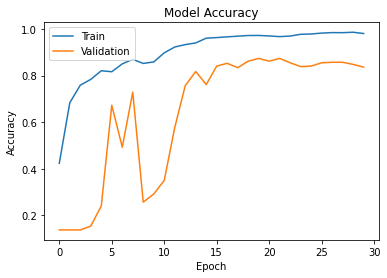

In [82]:
plotModelAccuracy(history2c)

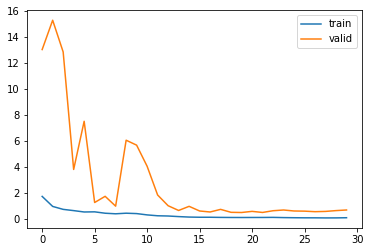

In [83]:
plotLossCurves(model2c, history2c)

**Observations**

We can see from the above plot that the training accuracy of the model was good but the validation accuracy was not good.
The model seems to overfit on the data.


### Evaluating the model on test data

In [84]:
accuracy = model2c.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.5479 - accuracy: 0.8547 - 379ms/epoch - 25ms/step


### Generating the predictions using test data

In [85]:
# Here we would get the output as probablities for each category
y_pred=model2c.predict(X_test_normalized)
y_pred

array([[3.2438902e-04, 2.7016762e-07, 3.3049314e-08, ..., 1.0153136e-09,
        8.6125212e-05, 8.3363642e-07],
       [1.0396276e-06, 7.7171385e-02, 1.3249225e-02, ..., 4.5425209e-01,
        4.2304865e-01, 1.0316926e-03],
       [2.3548873e-03, 2.6516823e-06, 5.6120512e-05, ..., 2.9755069e-04,
        3.7104823e-03, 2.4949195e-04],
       ...,
       [1.6869086e-08, 9.8676002e-01, 1.3233758e-02, ..., 8.7913890e-08,
        4.0757833e-09, 5.2235725e-07],
       [2.9655322e-07, 3.7654058e-09, 8.0408341e-08, ..., 2.6116022e-06,
        3.2149657e-07, 1.6096382e-06],
       [4.4990942e-01, 2.0854450e-04, 5.5689592e-04, ..., 1.9562799e-03,
        9.0959367e-07, 4.2572057e-01]], dtype=float32)

### Plotting the Confusion Matrix
- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

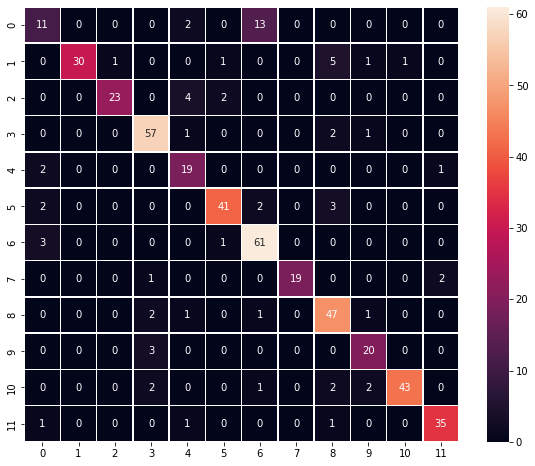

              precision    recall  f1-score   support

           0       0.58      0.42      0.49        26
           1       1.00      0.77      0.87        39
           2       0.96      0.79      0.87        29
           3       0.88      0.93      0.90        61
           4       0.68      0.86      0.76        22
           5       0.91      0.85      0.88        48
           6       0.78      0.94      0.85        65
           7       1.00      0.86      0.93        22
           8       0.78      0.90      0.84        52
           9       0.80      0.87      0.83        23
          10       0.98      0.86      0.91        50
          11       0.92      0.92      0.92        38

    accuracy                           0.85       475
   macro avg       0.86      0.83      0.84       475
weighted avg       0.86      0.85      0.85       475



In [86]:
printConfusionMatrixAndReport(y_pred)

**Observations**

We observe that some of the classes are not predicted correctly.
In comparison to the rest, we can see that classes 0,3, and 4 are well classified.
We can also observe that classes 1,2,5,7 and 9 are mostly misclassified.

## Data Augmentation

In [87]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

In [88]:
train_datagen = ImageDataGenerator(
                             # horizontal_flip = True,
                            #  vertical_flip = False, 
                             # height_shift_range= 0.1, 
                             # width_shift_range=0.1, 
                             # rotation_range=20, 
                             # shear_range = 0.1,
                            #  zoom_range=0.1
                              rotation_range=20, 
                              fill_mode='nearest'
                            )

train_generator = train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=random_seed,
                                       shuffle=False)

validation_datagen  = ImageDataGenerator()

# Flowing testing images in batches of batch_size using validation_datagen generator
validation_generator =  validation_datagen.flow(X_val_normalized, y_val_encoded,
                                                         batch_size=batch_size)

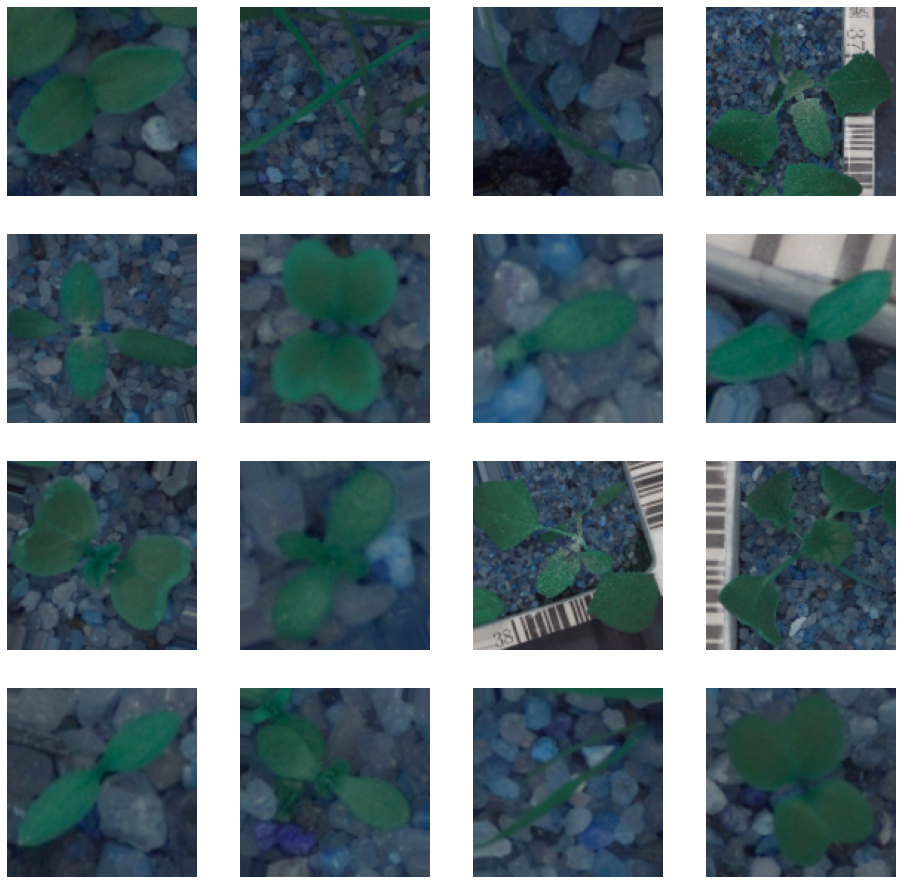

In [89]:
images, labels = next(train_generator)
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    ax.axis('off')

In [90]:

'''
# Intializing a sequential model
model3 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model3.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model3.add(MaxPooling2D((2, 2), padding = 'same'))
model3.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model3.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model3.add(Dense(16, activation='relu'))
model3.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model3.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model3.summary()
'''

# initialized a sequential model
model3 = Sequential()
# adding first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
#input_shape denotes input image dimension of images
model3.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
# adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding second conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model3.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 25% neurons to reduce overfitting

# adding third conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model3.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model3.add(Dropout(0.1))
model3.add(BatchNormalization())
# adding forth conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPool2D(pool_size=(2,2)))
#  adding dropout to randomly switch off 30% neurons to reduce overfitting
model3.add(Dropout(0.1))
model3.add(BatchNormalization())
model3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

# flattening the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model3.add(Flatten())
# adding first fully connected dense layer with 1024 neurons 
model3.add(Dense(64, activation = "relu"))
model3.add(BatchNormalization())
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2a.add(Dropout(0.5))
# adding second fully connected dense layer with 512 neurons 
model3.add(Dense(32, activation = "relu"))
model3.add(BatchNormalization())
#  adding dropout to randomly switch off 50% neurons to reduce overfitting
#model2a.add(Dropout(0.5))

# adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem with 12 classes.
model3.add(Dense(12, activation = "softmax"))

optimizer = Adam(lr=0.01)
model3.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
model3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [91]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5,min_lr=0.00001,mode='auto')

history3 = model3.fit(train_generator,
                    epochs=epochs,
                    steps_per_epoch=batch_size, #X_train_normalized.shape[0], 
                    verbose=1,
                    validation_data=validation_generator.next(),
                    callbacks=[reduce_lr],use_multiprocessing=True)

Epoch 1/30
64/64 [==============================] - 21s 307ms/step - loss: 2.4155 - accuracy: 0.1634 - val_loss: 4.7753 - val_accuracy: 0.0938 - lr: 0.0100
Epoch 2/30
64/64 [==============================] - 19s 288ms/step - loss: 1.7357 - accuracy: 0.3956 - val_loss: 7.5668 - val_accuracy: 0.0781 - lr: 0.0100
Epoch 3/30
64/64 [==============================] - 17s 256ms/step - loss: 1.4347 - accuracy: 0.4890 - val_loss: 4.2599 - val_accuracy: 0.2031 - lr: 0.0100
Epoch 4/30
64/64 [==============================] - 17s 262ms/step - loss: 1.2031 - accuracy: 0.5660 - val_loss: 3.7136 - val_accuracy: 0.2969 - lr: 0.0100
Epoch 5/30
64/64 [==============================] - 16s 240ms/step - loss: 0.8957 - accuracy: 0.6796 - val_loss: 5.4489 - val_accuracy: 0.1250 - lr: 0.0100
Epoch 6/30
64/64 [==============================] - 16s 238ms/step - loss: 0.7482 - accuracy: 0.7363 - val_loss: 3.5419 - val_accuracy: 0.2812 - lr: 0.0100
Epoch 7/30
64/64 [==============================] - 16s 239ms/st

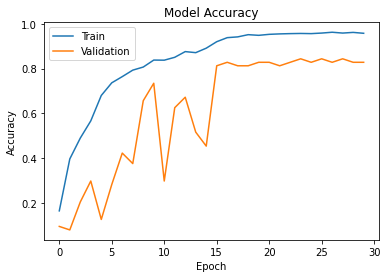

In [92]:
plotModelAccuracy(history3)

In [93]:
accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 0.4364 - accuracy: 0.8547 - 558ms/epoch - 37ms/step


In [94]:
# Here we would get the output as probablities for each category
y_pred=model3.predict(X_test_normalized)

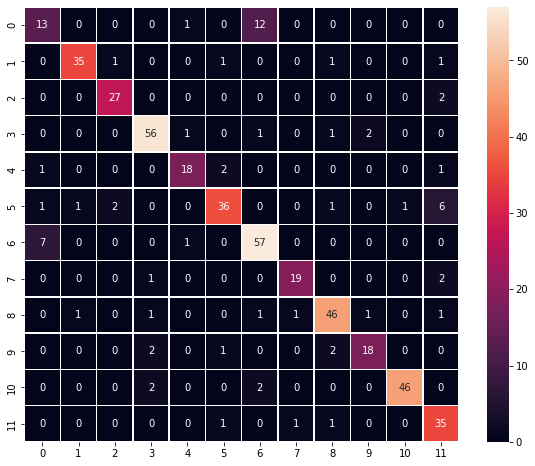

              precision    recall  f1-score   support

           0       0.59      0.50      0.54        26
           1       0.95      0.90      0.92        39
           2       0.90      0.93      0.92        29
           3       0.90      0.92      0.91        61
           4       0.86      0.82      0.84        22
           5       0.88      0.75      0.81        48
           6       0.78      0.88      0.83        65
           7       0.90      0.86      0.88        22
           8       0.88      0.88      0.88        52
           9       0.86      0.78      0.82        23
          10       0.98      0.92      0.95        50
          11       0.73      0.92      0.81        38

    accuracy                           0.85       475
   macro avg       0.85      0.84      0.84       475
weighted avg       0.86      0.85      0.85       475



In [95]:
printConfusionMatrixAndReport(y_pred)

### Model 4
Let us try Transfer Learning (MobileNetV2) with Data Agumentation


In [117]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

In [118]:
# Loading MobileNetV2 model 
from tensorflow.keras.applications import MobileNetV2
pt_model = MobileNetV2(weights='imagenet', include_top = False, input_shape = (128,128,3))
pt_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [119]:
# Making all the layers of the pretrained model non-trainable. i.e. freezing them
for layer in pt_model.layers:
    layer.trainable = False

In [120]:
for layer in pt_model.layers:
    print(layer.name, layer.trainable)

input_1 False
Conv1 False
bn_Conv1 False
Conv1_relu False
expanded_conv_depthwise False
expanded_conv_depthwise_BN False
expanded_conv_depthwise_relu False
expanded_conv_project False
expanded_conv_project_BN False
block_1_expand False
block_1_expand_BN False
block_1_expand_relu False
block_1_pad False
block_1_depthwise False
block_1_depthwise_BN False
block_1_depthwise_relu False
block_1_project False
block_1_project_BN False
block_2_expand False
block_2_expand_BN False
block_2_expand_relu False
block_2_depthwise False
block_2_depthwise_BN False
block_2_depthwise_relu False
block_2_project False
block_2_project_BN False
block_2_add False
block_3_expand False
block_3_expand_BN False
block_3_expand_relu False
block_3_pad False
block_3_depthwise False
block_3_depthwise_BN False
block_3_depthwise_relu False
block_3_project False
block_3_project_BN False
block_4_expand False
block_4_expand_BN False
block_4_expand_relu False
block_4_depthwise False
block_4_depthwise_BN False
block_4_depthwi

In [121]:
# Initializing the model
model4 = Sequential()

# Adding the convolutional part of the pretrained model from above
model4.add(pt_model)

# Flattening the output of the pretrained model because it is from a convolutional layer
model4.add(Flatten())

# Adding a dense input layer
model4.add(Dense(32, activation='relu'))

# Adding output layer
model4.add(Dense(12, activation='softmax'))

# Compiling the model
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Summary of the model
model4.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                                 
 dense (Dense)               (None, 32)                655392    
                                                                 
 dense_1 (Dense)             (None, 12)                396       
                                                                 
Total params: 2,913,772
Trainable params: 655,788
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5,min_lr=0.00001,mode='auto')

history4 = model4.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=random_seed,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=16, 
                    validation_data=validation_generator.next(),
                    verbose=1, callbacks=[reduce_lr],use_multiprocessing=True)

Epoch 1/30
 110/3847 [..............................] - ETA: 14:13 - loss: 1.8456 - accuracy: 0.4056

Process Keras_worker_ForkPoolWorker-122:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/data_utils.py", line 566, in get_index
    return _SHARED_SEQUENCES[uid][i]
  File "/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/iterator.py", line 65, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
  File "/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/numpy_array_iterator.py", line 162, in _get_batches_of_transformed_samples
    x.astype(self.dtype), params)
  File "/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py", line 

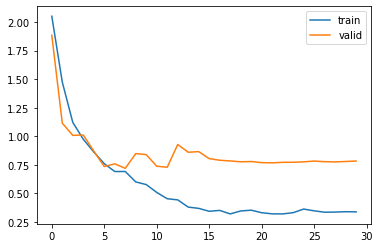

In [114]:
plotLossCurves(model4, history4)

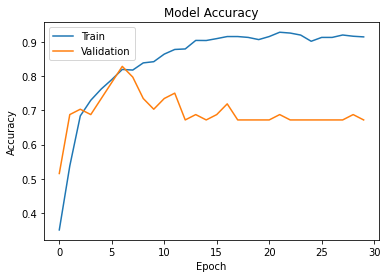

In [115]:
plotModelAccuracy(history4)

**Observations**

We can see from the above plot that the training accuracy of the model was good but the validation accuracy was not good.
The model seems to overfit on the data.


### Evaluating the model on test data

In [116]:
accuracy = model4.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 0.6406 - accuracy: 0.7916 - 1s/epoch - 76ms/step


### Generating the predictions using test data

In [105]:
# Here we would get the output as probablities for each category
y_pred=model4.predict(X_test_normalized)
y_pred

array([[8.8950328e-06, 1.5743946e-05, 1.1707437e-04, ..., 5.2967753e-05,
        9.9574596e-01, 8.4146850e-05],
       [6.1370462e-13, 2.3304533e-13, 1.3228325e-12, ..., 2.1276201e-09,
        1.0000000e+00, 1.2157465e-15],
       [2.1360408e-06, 2.0048421e-06, 1.5149124e-04, ..., 1.4345535e-07,
        2.5771530e-07, 2.3149708e-02],
       ...,
       [1.6975221e-06, 9.8025221e-01, 1.4430320e-08, ..., 4.8352854e-07,
        4.2917905e-09, 1.5232300e-04],
       [1.0427625e-10, 1.3196238e-07, 2.9217372e-08, ..., 3.0463670e-07,
        5.7945481e-06, 1.4372260e-05],
       [6.0381858e-06, 1.4055580e-04, 5.9072711e-03, ..., 2.9464906e-07,
        1.1417094e-06, 8.9335388e-01]], dtype=float32)

### Plotting the Confusion Matrix
- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

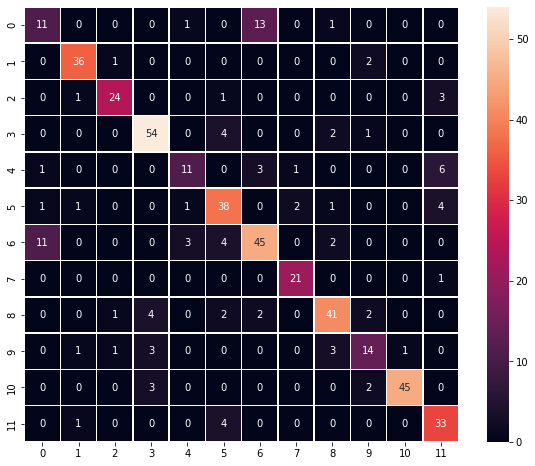

              precision    recall  f1-score   support

           0       0.46      0.42      0.44        26
           1       0.90      0.92      0.91        39
           2       0.89      0.83      0.86        29
           3       0.84      0.89      0.86        61
           4       0.69      0.50      0.58        22
           5       0.72      0.79      0.75        48
           6       0.71      0.69      0.70        65
           7       0.88      0.95      0.91        22
           8       0.82      0.79      0.80        52
           9       0.67      0.61      0.64        23
          10       0.98      0.90      0.94        50
          11       0.70      0.87      0.78        38

    accuracy                           0.79       475
   macro avg       0.77      0.76      0.76       475
weighted avg       0.79      0.79      0.78       475



In [106]:
printConfusionMatrixAndReport(y_pred)

**Observations**

We observe that some of the classes are not predicted correctly.
In comparison to the rest, we can see that classes 0,3, and 4 are well classified.
We can also observe that classes 1,2,5,7 and 9 are mostly misclassified.